**Document Used for the Notebook**

Using the blog article [The Illustrated Transformer](http://jalammar.github.io/illustrated-transformer/) by Jay Alammar. This is a popular, visually-rich guide that explains the core concepts behind the Transformer architecture, which powers most modern NLP models.

The article covers key ideas such as:

* Self-attention mechanisms
* Encoder-decoder structures
* Positional encoding
* The evolution of Transformers in deep learning


###### Installing and Importing Libraries

In [ ]:
!pip install langchain-community langchain

In [ ]:
!pip install -U langchain langchain-openai langchain-community


In [ ]:
!pip install -U langchain langchain-community huggingface_hub


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.6/536.6 kB 28.9 MB/s eta 0:00:00
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.36.0
    Uninstalling huggingface-hub-0.36.0:
      Successfully uninstalled huggingface-hub-0.36.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
transformers 4.57.6 requires huggingface-hub<1.0,>=0.34.0, but you have huggingface-hub 1.3.3 which is incompatible.


In [ ]:
from langchain_community.llms import HuggingFaceHub


In [ ]:
!pip install transformers faiss-cpu sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.8/23.8 MB 66.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 566.1/566.1 kB 28.3 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface_hub 1.3.3
    Uninstalling huggingface_hub-1.3.3:
      Successfully uninstalled huggingface_hub-1.3.3


In [ ]:
!pip freeze > requirement.txt

In [ ]:
!pip install -U langchain langchain-community beautifulsoup4 requests


In [ ]:
from langchain_community.document_loaders import WebBaseLoader


In [ ]:
!pip -q uninstall -y langchain langchain-community langchain-openai
!pip -q install "langchain<0.2.0" beautifulsoup4 requests


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.1/303.1 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.8/311.8 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langgraph-prebuilt 1.0.7 requires langchain-core>=1.0.0, but you have langchain-core 0.1.53 which is incompatible.
langchain-classic 1.0.1 requires langchain-core<2.0.0,>=1.2.5, but you have langchain-core 0.1.53 which is incompatible.
langchain-classic 1.0.1 requires lan

Step 1: Loading

Specify a DocumentLoader to load in unstructured data as Documents.


A WebBaseLoader is used to load all text from HTML webpages into a document format that we can use for NLP tasks

Loading the Web Document with LangChain

Using LangChain’s WebBaseLoader to load the blog content directly from the URL. This:

i. Fetches and parses the webpage

ii. Strips out HTML tags

iii. Returns clean, readable text stored in the data variable

This allows us to work with real-world web content without manual preprocessing.




In [ ]:
from langchain.document_loaders import WebBaseLoader

loader = WebBaseLoader("http://jalammar.github.io/illustrated-transformer/")
data = loader.load()

Step 2: Splitting

Split the Document into chunks for embedding and vector storage.



*   Vector Store: One of the most common ways to store and search over unstructured data is to embed it and store the resulting embedding vectors, and then at query time to embed the unstructured query and retrieve the embedding vectors that are 'most similar' to the embedded query.
*   Text Embedding:  It is the process of converting text into a numerical representation, typically a vector (a list of numbers). Each word or subword in the text is mapped to a vector in such a way that similar words or phrases have similar vector representations.



In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(chunk_size = 500, chunk_overlap = 0) #Chunk Size=500: Each chunk will contain up to 500 characters. Chunk Overlap = 0, no overlap is introducted
all_splits = text_splitter.split_documents(data)


Step 3: Storing

Embedding the contents of each document, then store the embedding and document in a vector store, with the embedding being used to index the document.

In [ ]:
# Import FAISS from Langchain Vectorstore
from langchain.vectorstores import FAISS

In [ ]:
from langchain.llms import HuggingFacePipeline
from langchain.embeddings import HuggingFaceEmbeddings

In [ ]:
model_name = "sentence-transformers/all-mpnet-base-v2" #to optimize for creating embeddings of sentences & text
model_kwargs = {'device': 'cpu'}
encode_kwargs = {'normalize_embeddings': False} #to prevent normalizaton of the embeddings
hf = HuggingFaceEmbeddings(
    model_name=model_name,
    model_kwargs=model_kwargs,
    encode_kwargs=encode_kwargs
)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
 # Creating a vector store
vectorstore = FAISS.from_documents(documents=all_splits, embedding=hf) ## hf are the hugging face embeddings

Step 4: Retrieval

In [ ]:
question = "What are transformers?"
docs = vectorstore.similarity_search(question) #searching the vector store for the most relevant document chunks based on the similarity of their embeddings to the query's embedding.
docs

[Document(page_content='Alammar, J (2018). The Illustrated Transformer [Blog post]. Retrieved from https://jalammar.github.io/illustrated-transformer/\n\nNote: If you translate any of the posts, let me know so I can link your translation to the original post. My email is in the about page.', metadata={'source': 'http://jalammar.github.io/illustrated-transformer/', 'title': 'The Illustrated Transformer – Jay Alammar – Visualizing machine learning one concept at a time.', 'description': "Discussions:\nHacker News (65 points, 4 comments), Reddit r/MachineLearning (29 points, 3 comments)\n\n\nTranslations: Arabic, Chinese (Simplified) 1, Chinese (Simplified) 2, French 1, French 2, Italian, Japanese, Korean, Persian, Russian, Spanish 1, Spanish 2, Vietnamese\n\nWatch: MIT’s Deep Learning State of the Art lecture referencing this post\n\nFeatured in courses at Stanford, Harvard, MIT, Princeton, CMU and others\n\n\n \n  \n\n  \n  Update: This post has now become a book! Check out LLM-book.com

Step 5: Generation

In [ ]:
question = "What are transformers?"

In [ ]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer, pipeline
from langchain.llms import HuggingFacePipeline
from langchain.chains import RetrievalQA

# Load model and tokenizer
model_name = "google/flan-t5-large"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

# Define the pipeline
hf_pipeline = pipeline("text2text-generation", model=model, tokenizer=tokenizer, max_length=512)

# Wrap the pipeline in LangChain's LLM class
llm = HuggingFacePipeline(pipeline=hf_pipeline)

tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.13G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
from langchain.chains import RetrievalQA

qa_chain = RetrievalQA.from_chain_type(llm,retriever=vectorstore.as_retriever())
qa_chain({"query": question})

/usr/local/lib/python3.12/dist-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(


{'query': 'What are transformers?',
 'result': 'In this post, we will attempt to oversimplify things a bit and introduce the concepts one by one to hopefully make it easier to understand to people without in-depth knowledge of the subject matter.'}

In [ ]:
question = " What is attention mechanism?"
qa_chain({"query": question})

{'query': ' What is attention mechanism?', 'result': 'multi-headed'}

Step 6: Chat

Conservation Summary Memory:  summarizes the conversation as it happens and stores the current summary in memory. This memory can then be used to inject the summary of the conversation so far into a prompt/chain. This memory is most useful for longer conversations, where keeping the past message history in the prompt verbatim would take up too many tokens.



In [ ]:
from langchain.memory import ConversationSummaryMemory


In [ ]:
memory = ConversationSummaryMemory(
    llm=llm,
    memory_key="chat_history",
    return_messages=True
)

Conversational Retrieval Chain

This is a type of chain for having a conversation based on retrieved documents. This chain takes in chat history (a list of messages) and new questions, and then returns an answer to that question. The algorithm for this chain consists of three parts:

Use the chat history and the new question to create a “standalone question”. This is done so that this question can be passed into the retrieval step to fetch relevant documents. If only the new question was passed in, then the relevant context may be lacking. If the whole conversation was passed into retrieval, there may be unnecessary information there that would distract from retrieval.

This new standalone question is passed to the retriever, and relevant documents are returned.

The retrieved documents are passed to an LLM along with either the new question (default behavior) or the original question and chat history to generate a final response.

In [ ]:
from langchain.chains import ConversationalRetrievalChain

retriever = vectorstore.as_retriever()
chat = ConversationalRetrievalChain.from_llm(
    llm,
    retriever=retriever,
    memory=memory,
    verbose=True
)

In [ ]:
chat("Explain self-attention")




> Entering new LLMChain chain...
Prompt after formatting:
Given the following conversation and a follow up question, rephrase the follow up question to be a standalone question, in its original language.

Chat History:

system: 
Follow Up Input: Explain self-attention
Standalone question:

> Finished chain.


> Entering new StuffDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer.

If you’re familiar with RNNs, think of how maintaining a hidden state allows an RNN to incorporate its representation of previous words/vectors it has processed with the current one it’s processing. Self-attention is the method the Transformer uses to bake the “understanding” of other relevant words into the one we’re currently processing.

The second step in calculating self-attention is to calculate a score. Say w

{'question': 'Explain self-attention',
 'chat_history': [SystemMessage(content='')],
 'answer': 'the method the Transformer uses to bake the “understanding” of other relevant words into the one we’re currently processing'}

In [ ]:
chat("What is a gentler approach to transformers?")



> Entering new LLMChain chain...
Prompt after formatting:
Given the following conversation and a follow up question, rephrase the follow up question to be a standalone question, in its original language.

Chat History:

system: Self-attention AI is the method the Transformer uses to bake the “understanding” of other relevant words into the one we’re currently processing.
Follow Up Input: What is a gentler approach to transformers?
Standalone question:

> Finished chain.


> Entering new StuffDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer.

Go Forth And Transform
I hope you’ve found this a useful place to start to break the ice with the major concepts of the Transformer. If you want to go deeper, I’d suggest these next steps:

Alammar, J (2018). The Illustrated Transformer [Blog post]. Ret

{'question': 'What is a gentler approach to transformers?',
 'chat_history': [SystemMessage(content='Self-attention AI is the method the Transformer uses to bake the “understanding” of other relevant words into the one we’re currently processing.')],
 'answer': 'In this post, we will attempt to oversimplify things a bit and introduce the concepts one by one to hopefully make it easier to understand to people without in-depth knowledge of the subject matter.'}

In [ ]:
chat("Where were transformers proposed?")




> Entering new LLMChain chain...
Prompt after formatting:
Given the following conversation and a follow up question, rephrase the follow up question to be a standalone question, in its original language.

Chat History:

system: In this post, we will attempt to oversimplify things a bit and introduce the concepts one by one to hopefully make it easier to understand to people without in-depth knowledge of the subject matter.
Follow Up Input: Where were transformers proposed?
Standalone question:

> Finished chain.


> Entering new StuffDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer.

Alammar, J (2018). The Illustrated Transformer [Blog post]. Retrieved from https://jalammar.github.io/illustrated-transformer/

Note: If you translate any of the posts, let me know so I can link your translatio

{'question': 'Where were transformers proposed?',
 'chat_history': [SystemMessage(content='In this post, we will attempt to oversimplify things a bit and introduce the concepts one by one to hopefully make it easier to understand to people without in-depth knowledge of the subject matter.')],
 'answer': 'not enough information'}

In [ ]:
chat("What are the different layers in a typical Transformer model?")




> Entering new LLMChain chain...
Prompt after formatting:
Given the following conversation and a follow up question, rephrase the follow up question to be a standalone question, in its original language.

Chat History:

system: Transformers were proposed in the early 20th century.
Follow Up Input: What are the different layers in a typical Transformer model?
Standalone question:

> Finished chain.


> Entering new StuffDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer.

Go Forth And Transform
I hope you’ve found this a useful place to start to break the ice with the major concepts of the Transformer. If you want to go deeper, I’d suggest these next steps:

Alammar, J (2018). The Illustrated Transformer [Blog post]. Retrieved from https://jalammar.github.io/illustrated-transformer/

Note: If 

{'question': 'What are the different layers in a typical Transformer model?',
 'chat_history': [SystemMessage(content='Transformers were proposed in the early 20th century.')],
 'answer': '2 stacked encoders and decoders'}

In [ ]:
chat("If the vocabulary is 10,000 words, what would the width of the logits vector?")




> Entering new LLMChain chain...
Prompt after formatting:
Given the following conversation and a follow up question, rephrase the follow up question to be a standalone question, in its original language.

Chat History:

system: Transformers were proposed in the early 20th century.
Follow Up Input: If the vocabulary is 10,000 words, what would the width of the logits vector?
Standalone question:

> Finished chain.


> Entering new StuffDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer.

Let’s assume that our model knows 10,000 unique English words (our model’s “output vocabulary”) that it’s learned from its training dataset. This would make the logits vector 10,000 cells wide – each cell corresponding to the score of a unique word. That is how we interpret the output of the model followed by 

{'question': 'If the vocabulary is 10,000 words, what would the width of the logits vector?',
 'chat_history': [SystemMessage(content='Transformers were proposed in the early 20th century.')],
 'answer': '10,000 cells'}

In [ ]:
chat("Explain the training process of a Transformer network in detail")




> Entering new LLMChain chain...
Prompt after formatting:
Given the following conversation and a follow up question, rephrase the follow up question to be a standalone question, in its original language.

Chat History:

system: The logits vector has a width of 10,000 cells.
Follow Up Input: Explain the training process of a Transformer network in detail
Standalone question:

> Finished chain.


> Entering new StuffDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer.

Recap Of Training
Now that we’ve covered the entire forward-pass process through a trained Transformer, it would be useful to glance at the intuition of training the model.
During training, an untrained model would go through the exact same forward pass. But since we are training it on a labeled training dataset, we can compare it

{'question': 'Explain the training process of a Transformer network in detail',
 'chat_history': [SystemMessage(content='The logits vector has a width of 10,000 cells.')],
 'answer': 'The output of each step is fed to the bottom decoder in the next time step, and the decoders bubble up their decoding results just like the encoders did. And just like we did with the encoder inputs, we embed and add positional encoding to those decoder inputs to indicate the position of each word.'}

### Exploratory Data Analysis

In [ ]:
# 1. Dataset Summary
print(f"Total documents: {len(data)}")

# Extract the text content from each Document object
document_lengths = [len(doc.page_content.split()) for doc in data]  # Assuming 'data' is a list of Document objects

# Display summary statistics
print(f"Average document length: {sum(document_lengths)/len(document_lengths)} words")
print(f"Minimum document length: {min(document_lengths)} words")
print(f"Maximum document length: {max(document_lengths)} words")

Total documents: 1
Average document length: 4199.0 words
Minimum document length: 4199 words
Maximum document length: 4199 words


In [ ]:
# 2. Text Sample Inspection
sample_size = 5
print(f"Displaying {sample_size} sample documents:")

for i in range(min(sample_size, len(data))):
    print(f"\nSample {i+1}:")
    print(data[i].page_content[:500])  # Display the first 500 characters of each document

Displaying 5 sample documents:

Sample 1:



The Illustrated Transformer – Jay Alammar – Visualizing machine learning one concept at a time.





































Jay Alammar
Visualizing machine learning one concept at a time.Read our book, Hands-On Large Language Models and follow me on LinkedIn, Bluesky, Substack, X,YouTube 


Blog
About






The Illustrated Transformer

Discussions:
Hacker News (65 points, 4 comments), Reddit r/MachineLearning (29 points, 3 comments)


Translations: Arabic, Chinese (Simplified) 1, Chi


In [ ]:
# 3. Tokenization
from transformers import AutoTokenizer

# Load tokenizer for FLAN-T5 model
tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-large")

# Apply tokenizer and check token counts for first few documents
tokenized_lengths = [len(tokenizer.tokenize(doc.page_content)) for doc in data]
print(f"Average token length: {sum(tokenized_lengths)/len(tokenized_lengths)} tokens")
print(f"Minimum token length: {min(tokenized_lengths)} tokens")
print(f"Maximum token length: {max(tokenized_lengths)} tokens")


Token indices sequence length is longer than the specified maximum sequence length for this model (6058 > 512). Running this sequence through the model will result in indexing errors


Average token length: 6058.0 tokens
Minimum token length: 6058 tokens
Maximum token length: 6058 tokens


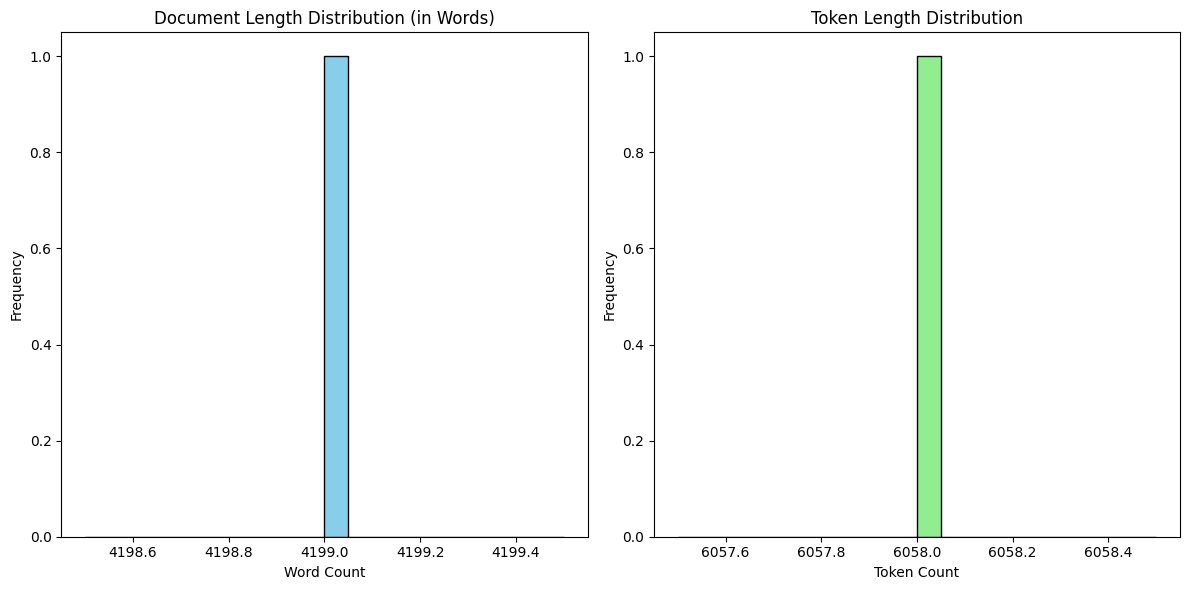

In [ ]:
# 4. Document Distribution Analysis
import matplotlib.pyplot as plt

# Plot the distribution of document lengths (in words) and token lengths
plt.figure(figsize=(12, 6))

# Document length distribution
plt.subplot(1, 2, 1)
plt.hist(document_lengths, bins=20, color='skyblue', edgecolor='black')
plt.title("Document Length Distribution (in Words)")
plt.xlabel("Word Count")
plt.ylabel("Frequency")

# Token length distribution
plt.subplot(1, 2, 2)
plt.hist(tokenized_lengths, bins=20, color='lightgreen', edgecolor='black')
plt.title("Token Length Distribution")
plt.xlabel("Token Count")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import nbformat
path = "/content/drive/MyDrive/Colab Notebooks/LangChain_Dcoument_Q&A_.ipynb"
nb = nbformat.read(path, as_version=4)
nb.metadata.pop("widgets", None)
nb.metadata.pop("widgets_state", None)
nb.metadata.pop("widgets_state", None)
for cell in nb.cells:
  cell.metadata.pop("widgets", None)
nbformat.write(nb, path)
print("Cleaned notebook metadata for Github:", path)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/LangChain_Dcoument_Q&A_.ipynb'

In [ ]:
!find "/content/drive/MyDrive" - name "*.ipynb"